In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-disease-classification/pd_speech_features.csv


In [6]:
dataset = pd.read_csv("/kaggle/input/parkinsons-disease-classification/pd_speech_features.csv", header=1)

# List of Columns

In [136]:
# indiv
dataset.columns[:2]

Index(['id', 'gender'], dtype='object')

In [143]:
# PeriodPulses,
dataset.columns[2:9]

Index(['PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses'],
      dtype='object')

In [142]:
# Jitter
dataset.columns[9:14]

Index(['locPctJitter', 'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter'], dtype='object')

In [56]:
# Shimmer
dataset.columns[14:20]

Index(['locShimmer', 'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer',
       'apq11Shimmer', 'ddaShimmer'],
      dtype='object')

In [45]:
dataset.columns[21:34]

Index(['meanNoiseToHarmHarmonicity', 'meanHarmToNoiseHarmonicity',
       'minIntensity', 'maxIntensity', 'meanIntensity', 'f1', 'f2', 'f3', 'f4',
       'b1', 'b2', 'b3', 'b4'],
      dtype='object')

In [59]:
# GQ
dataset.columns[34:37]

Index(['GQ_prc5_95', 'GQ_std_cycle_open', 'GQ_std_cycle_closed'], dtype='object')

In [61]:
# GNE
dataset.columns[37:43]

Index(['GNE_mean', 'GNE_std', 'GNE_SNR_TKEO', 'GNE_SNR_SEO', 'GNE_NSR_TKEO',
       'GNE_NSR_SEO'],
      dtype='object')

In [62]:
# VFER
dataset.columns[43:50]

Index(['VFER_mean', 'VFER_std', 'VFER_entropy', 'VFER_SNR_TKEO',
       'VFER_SNR_SEO', 'VFER_NSR_TKEO', 'VFER_NSR_SEO'],
      dtype='object')

In [44]:
# IMF_SNR
dataset.columns[50:56]

Index(['IMF_SNR_SEO', 'IMF_SNR_TKEO', 'IMF_SNR_entropy', 'IMF_NSR_SEO',
       'IMF_NSR_TKEO', 'IMF_NSR_entropy'],
      dtype='object')

In [40]:
# mean_log_MFCC
dataset.columns[56:70]

Index(['mean_Log_energy', 'mean_MFCC_0th_coef', 'mean_MFCC_1st_coef',
       'mean_MFCC_2nd_coef', 'mean_MFCC_3rd_coef', 'mean_MFCC_4th_coef',
       'mean_MFCC_5th_coef', 'mean_MFCC_6th_coef', 'mean_MFCC_7th_coef',
       'mean_MFCC_8th_coef', 'mean_MFCC_9th_coef', 'mean_MFCC_10th_coef',
       'mean_MFCC_11th_coef', 'mean_MFCC_12th_coef'],
      dtype='object')

In [41]:
# mean_delta
dataset.columns[70:84]

Index(['mean_delta_log_energy', 'mean_0th_delta', 'mean_1st_delta',
       'mean_2nd_delta', 'mean_3rd_delta', 'mean_4th_delta', 'mean_5th_delta',
       'mean_6th_delta', 'mean_7th_delta', 'mean_8th_delta', 'mean_9th_delta',
       'mean_10th_delta', 'mean_11th_delta', 'mean_12th_delta'],
      dtype='object')

In [64]:
# mean_delta_delta
dataset.columns[84:98]

Index(['mean_delta_delta_log_energy', 'mean_delta_delta_0th',
       'mean_1st_delta_delta', 'mean_2nd_delta_delta', 'mean_3rd_delta_delta',
       'mean_4th_delta_delta', 'mean_5th_delta_delta', 'mean_6th_delta_delta',
       'mean_7th_delta_delta', 'mean_8th_delta_delta', 'mean_9th_delta_delta',
       'mean_10th_delta_delta', 'mean_11th_delta_delta',
       'mean_12th_delta_delta'],
      dtype='object')

In [68]:
# std_log_MFCC
dataset.columns[98:112]

Index(['std_Log_energy', 'std_MFCC_0th_coef', 'std_MFCC_1st_coef',
       'std_MFCC_2nd_coef', 'std_MFCC_3rd_coef', 'std_MFCC_4th_coef',
       'std_MFCC_5th_coef', 'std_MFCC_6th_coef', 'std_MFCC_7th_coef',
       'std_MFCC_8th_coef', 'std_MFCC_9th_coef', 'std_MFCC_10th_coef',
       'std_MFCC_11th_coef', 'std_MFCC_12th_coef'],
      dtype='object')

In [70]:
# std_delta_log
dataset.columns[112:126]

Index(['std_delta_log_energy', 'std_0th_delta', 'std_1st_delta',
       'std_2nd_delta', 'std_3rd_delta', 'std_4th_delta', 'std_5th_delta',
       'std_6th_delta', 'std_7th_delta', 'std_8th_delta', 'std_9th_delta',
       'std_10th_delta', 'std_11th_delta', 'std_12th_delta'],
      dtype='object')

In [72]:
# std_delta_delta_log
dataset.columns[126:140]

Index(['std_delta_delta_log_energy', 'std_delta_delta_0th',
       'std_1st_delta_delta', 'std_2nd_delta_delta', 'std_3rd_delta_delta',
       'std_4th_delta_delta', 'std_5th_delta_delta', 'std_6th_delta_delta',
       'std_7th_delta_delta', 'std_8th_delta_delta', 'std_9th_delta_delta',
       'std_10th_delta_delta', 'std_11th_delta_delta', 'std_12th_delta_delta'],
      dtype='object')

In [76]:
# Ed_coef
dataset.columns[140:151]

Index(['Ea', 'Ed_1_coef', 'Ed_2_coef', 'Ed_3_coef', 'Ed_4_coef', 'Ed_5_coef',
       'Ed_6_coef', 'Ed_7_coef', 'Ed_8_coef', 'Ed_9_coef', 'Ed_10_coef'],
      dtype='object')

In [80]:
# det_entropy_shannon
dataset.columns[151:161]

Index(['det_entropy_shannon_1_coef', 'det_entropy_shannon_2_coef',
       'det_entropy_shannon_3_coef', 'det_entropy_shannon_4_coef',
       'det_entropy_shannon_5_coef', 'det_entropy_shannon_6_coef',
       'det_entropy_shannon_7_coef', 'det_entropy_shannon_8_coef',
       'det_entropy_shannon_9_coef', 'det_entropy_shannon_10_coef'],
      dtype='object')

In [81]:
# det_entropy_log
dataset.columns[161:171]

Index(['det_entropy_log_1_coef', 'det_entropy_log_2_coef',
       'det_entropy_log_3_coef', 'det_entropy_log_4_coef',
       'det_entropy_log_5_coef', 'det_entropy_log_6_coef',
       'det_entropy_log_7_coef', 'det_entropy_log_8_coef',
       'det_entropy_log_9_coef', 'det_entropy_log_10_coef'],
      dtype='object')

In [83]:
# det_TKEO_mean
dataset.columns[171:181]

Index(['det_TKEO_mean_1_coef', 'det_TKEO_mean_2_coef', 'det_TKEO_mean_3_coef',
       'det_TKEO_mean_4_coef', 'det_TKEO_mean_5_coef', 'det_TKEO_mean_6_coef',
       'det_TKEO_mean_7_coef', 'det_TKEO_mean_8_coef', 'det_TKEO_mean_9_coef',
       'det_TKEO_mean_10_coef'],
      dtype='object')

In [84]:
# det_TKEO_std
dataset.columns[181:191]

Index(['det_TKEO_std_1_coef', 'det_TKEO_std_2_coef', 'det_TKEO_std_3_coef',
       'det_TKEO_std_4_coef', 'det_TKEO_std_5_coef', 'det_TKEO_std_6_coef',
       'det_TKEO_std_7_coef', 'det_TKEO_std_8_coef', 'det_TKEO_std_9_coef',
       'det_TKEO_std_10_coef'],
      dtype='object')

In [85]:
dataset.columns[191:201]

Index(['app_entropy_shannon_1_coef', 'app_entropy_shannon_2_coef',
       'app_entropy_shannon_3_coef', 'app_entropy_shannon_4_coef',
       'app_entropy_shannon_5_coef', 'app_entropy_shannon_6_coef',
       'app_entropy_shannon_7_coef', 'app_entropy_shannon_8_coef',
       'app_entropy_shannon_9_coef', 'app_entropy_shannon_10_coef'],
      dtype='object')

In [86]:
# app_entropy_log
dataset.columns[201:211]

Index(['app_entropy_log_1_coef', 'app_entropy_log_2_coef',
       'app_entropy_log_3_coef', 'app_entropy_log_4_coef',
       'app_entropy_log_5_coef', 'app_entropy_log_6_coef',
       'app_entropy_log_7_coef', 'app_entropy_log_8_coef',
       'app_entropy_log_9_coef', 'app_entropy_log_10_coef'],
      dtype='object')

In [87]:
# app_det_TKEO_mean_coef
dataset.columns[211:221]

Index(['app_det_TKEO_mean_1_coef', 'app_det_TKEO_mean_2_coef',
       'app_det_TKEO_mean_3_coef', 'app_det_TKEO_mean_4_coef',
       'app_det_TKEO_mean_5_coef', 'app_det_TKEO_mean_6_coef',
       'app_det_TKEO_mean_7_coef', 'app_det_TKEO_mean_8_coef',
       'app_det_TKEO_mean_9_coef', 'app_det_TKEO_mean_10_coef'],
      dtype='object')

In [88]:
# app_TKEO_std_coef
dataset.columns[221:231]

Index(['app_TKEO_std_1_coef', 'app_TKEO_std_2_coef', 'app_TKEO_std_3_coef',
       'app_TKEO_std_4_coef', 'app_TKEO_std_5_coef', 'app_TKEO_std_6_coef',
       'app_TKEO_std_7_coef', 'app_TKEO_std_8_coef', 'app_TKEO_std_9_coef',
       'app_TKEO_std_10_coef'],
      dtype='object')

In [93]:
# Ed_coef
dataset.columns[231:242]

Index(['Ea2', 'Ed2_1_coef', 'Ed2_2_coef', 'Ed2_3_coef', 'Ed2_4_coef',
       'Ed2_5_coef', 'Ed2_6_coef', 'Ed2_7_coef', 'Ed2_8_coef', 'Ed2_9_coef',
       'Ed2_10_coef'],
      dtype='object')

In [94]:
# det_LT_entorpy_shannon
dataset.columns[242:252]

Index(['det_LT_entropy_shannon_1_coef', 'det_LT_entropy_shannon_2_coef',
       'det_LT_entropy_shannon_3_coef', 'det_LT_entropy_shannon_4_coef',
       'det_LT_entropy_shannon_5_coef', 'det_LT_entropy_shannon_6_coef',
       'det_LT_entropy_shannon_7_coef', 'det_LT_entropy_shannon_8_coef',
       'det_LT_entropy_shannon_9_coef', 'det_LT_entropy_shannon_10_coef'],
      dtype='object')

In [95]:
# det_LT_entorpy_log_coef
dataset.columns[252:262]

Index(['det_LT_entropy_log_1_coef', 'det_LT_entropy_log_2_coef',
       'det_LT_entropy_log_3_coef', 'det_LT_entropy_log_4_coef',
       'det_LT_entropy_log_5_coef', 'det_LT_entropy_log_6_coef',
       'det_LT_entropy_log_7_coef', 'det_LT_entropy_log_8_coef',
       'det_LT_entropy_log_9_coef', 'det_LT_entropy_log_10_coef'],
      dtype='object')

In [97]:
# det_LT_TKEO_mean_coef
dataset.columns[262:272]

Index(['det_LT_TKEO_mean_1_coef', 'det_LT_TKEO_mean_2_coef',
       'det_LT_TKEO_mean_3_coef', 'det_LT_TKEO_mean_4_coef',
       'det_LT_TKEO_mean_5_coef', 'det_LT_TKEO_mean_6_coef',
       'det_LT_TKEO_mean_7_coef', 'det_LT_TKEO_mean_8_coef',
       'det_LT_TKEO_mean_9_coef', 'det_LT_TKEO_mean_10_coef'],
      dtype='object')

In [98]:
# det_LT_TKEO_std_coef
dataset.columns[272:282]

Index(['det_LT_TKEO_std_1_coef', 'det_LT_TKEO_std_2_coef',
       'det_LT_TKEO_std_3_coef', 'det_LT_TKEO_std_4_coef',
       'det_LT_TKEO_std_5_coef', 'det_LT_TKEO_std_6_coef',
       'det_LT_TKEO_std_7_coef', 'det_LT_TKEO_std_8_coef',
       'det_LT_TKEO_std_9_coef', 'det_LT_TKEO_std_10_coef'],
      dtype='object')

In [99]:
# app_LT_entorpy_shannon_coef
dataset.columns[282:292]

Index(['app_LT_entropy_shannon_1_coef', 'app_LT_entropy_shannon_2_coef',
       'app_LT_entropy_shannon_3_coef', 'app_LT_entropy_shannon_4_coef',
       'app_LT_entropy_shannon_5_coef', 'app_LT_entropy_shannon_6_coef',
       'app_LT_entropy_shannon_7_coef', 'app_LT_entropy_shannon_8_coef',
       'app_LT_entropy_shannon_9_coef', 'app_LT_entropy_shannon_10_coef'],
      dtype='object')

In [102]:
# app_LT_entropy_log_coef
dataset.columns[292:302]

Index(['app_LT_entropy_log_1_coef', 'app_LT_entropy_log_2_coef',
       'app_LT_entropy_log_3_coef', 'app_LT_entropy_log_4_coef',
       'app_LT_entropy_log_5_coef', 'app_LT_entropy_log_6_coef',
       'app_LT_entropy_log_7_coef', 'app_LT_entropy_log_8_coef',
       'app_LT_entropy_log_9_coef', 'app_LT_entropy_log_10_coef'],
      dtype='object')

In [103]:
# app_LT_TKEO_mean_coef
dataset.columns[302:312]

Index(['app_LT_TKEO_mean_1_coef', 'app_LT_TKEO_mean_2_coef',
       'app_LT_TKEO_mean_3_coef', 'app_LT_TKEO_mean_4_coef',
       'app_LT_TKEO_mean_5_coef', 'app_LT_TKEO_mean_6_coef',
       'app_LT_TKEO_mean_7_coef', 'app_LT_TKEO_mean_8_coef',
       'app_LT_TKEO_mean_9_coef', 'app_LT_TKEO_mean_10_coef'],
      dtype='object')

In [104]:
# app_LT_TKEO_std_coef
dataset.columns[312:322]

Index(['app_LT_TKEO_std_1_coef', 'app_LT_TKEO_std_2_coef',
       'app_LT_TKEO_std_3_coef', 'app_LT_TKEO_std_4_coef',
       'app_LT_TKEO_std_5_coef', 'app_LT_TKEO_std_6_coef',
       'app_LT_TKEO_std_7_coef', 'app_LT_TKEO_std_8_coef',
       'app_LT_TKEO_std_9_coef', 'app_LT_TKEO_std_10_coef'],
      dtype='object')

In [110]:
# tqwt_energy_dec
dataset.columns[322:358]

Index(['tqwt_energy_dec_1', 'tqwt_energy_dec_2', 'tqwt_energy_dec_3',
       'tqwt_energy_dec_4', 'tqwt_energy_dec_5', 'tqwt_energy_dec_6',
       'tqwt_energy_dec_7', 'tqwt_energy_dec_8', 'tqwt_energy_dec_9',
       'tqwt_energy_dec_10', 'tqwt_energy_dec_11', 'tqwt_energy_dec_12',
       'tqwt_energy_dec_13', 'tqwt_energy_dec_14', 'tqwt_energy_dec_15',
       'tqwt_energy_dec_16', 'tqwt_energy_dec_17', 'tqwt_energy_dec_18',
       'tqwt_energy_dec_19', 'tqwt_energy_dec_20', 'tqwt_energy_dec_21',
       'tqwt_energy_dec_22', 'tqwt_energy_dec_23', 'tqwt_energy_dec_24',
       'tqwt_energy_dec_25', 'tqwt_energy_dec_26', 'tqwt_energy_dec_27',
       'tqwt_energy_dec_28', 'tqwt_energy_dec_29', 'tqwt_energy_dec_30',
       'tqwt_energy_dec_31', 'tqwt_energy_dec_32', 'tqwt_energy_dec_33',
       'tqwt_energy_dec_34', 'tqwt_energy_dec_35', 'tqwt_energy_dec_36'],
      dtype='object')

In [117]:
# tqwt_entorpy_shannon_dec
dataset.columns[358:394]

Index(['tqwt_entropy_shannon_dec_1', 'tqwt_entropy_shannon_dec_2',
       'tqwt_entropy_shannon_dec_3', 'tqwt_entropy_shannon_dec_4',
       'tqwt_entropy_shannon_dec_5', 'tqwt_entropy_shannon_dec_6',
       'tqwt_entropy_shannon_dec_7', 'tqwt_entropy_shannon_dec_8',
       'tqwt_entropy_shannon_dec_9', 'tqwt_entropy_shannon_dec_10',
       'tqwt_entropy_shannon_dec_11', 'tqwt_entropy_shannon_dec_12',
       'tqwt_entropy_shannon_dec_13', 'tqwt_entropy_shannon_dec_14',
       'tqwt_entropy_shannon_dec_15', 'tqwt_entropy_shannon_dec_16',
       'tqwt_entropy_shannon_dec_17', 'tqwt_entropy_shannon_dec_18',
       'tqwt_entropy_shannon_dec_19', 'tqwt_entropy_shannon_dec_20',
       'tqwt_entropy_shannon_dec_21', 'tqwt_entropy_shannon_dec_22',
       'tqwt_entropy_shannon_dec_23', 'tqwt_entropy_shannon_dec_24',
       'tqwt_entropy_shannon_dec_25', 'tqwt_entropy_shannon_dec_26',
       'tqwt_entropy_shannon_dec_27', 'tqwt_entropy_shannon_dec_28',
       'tqwt_entropy_shannon_dec_29', 'tqwt

In [121]:
# tqwt_entropy_log_dec
dataset.columns[394:430]

Index(['tqwt_entropy_log_dec_1', 'tqwt_entropy_log_dec_2',
       'tqwt_entropy_log_dec_3', 'tqwt_entropy_log_dec_4',
       'tqwt_entropy_log_dec_5', 'tqwt_entropy_log_dec_6',
       'tqwt_entropy_log_dec_7', 'tqwt_entropy_log_dec_8',
       'tqwt_entropy_log_dec_9', 'tqwt_entropy_log_dec_10',
       'tqwt_entropy_log_dec_11', 'tqwt_entropy_log_dec_12',
       'tqwt_entropy_log_dec_13', 'tqwt_entropy_log_dec_14',
       'tqwt_entropy_log_dec_15', 'tqwt_entropy_log_dec_16',
       'tqwt_entropy_log_dec_17', 'tqwt_entropy_log_dec_18',
       'tqwt_entropy_log_dec_19', 'tqwt_entropy_log_dec_20',
       'tqwt_entropy_log_dec_21', 'tqwt_entropy_log_dec_22',
       'tqwt_entropy_log_dec_23', 'tqwt_entropy_log_dec_24',
       'tqwt_entropy_log_dec_25', 'tqwt_entropy_log_dec_26',
       'tqwt_entropy_log_dec_27', 'tqwt_entropy_log_dec_28',
       'tqwt_entropy_log_dec_29', 'tqwt_entropy_log_dec_30',
       'tqwt_entropy_log_dec_31', 'tqwt_entropy_log_dec_32',
       'tqwt_entropy_log_dec_33',

In [124]:
# tqwt_TKEO_mean_dec
dataset.columns[430:466]

Index(['tqwt_TKEO_mean_dec_1', 'tqwt_TKEO_mean_dec_2', 'tqwt_TKEO_mean_dec_3',
       'tqwt_TKEO_mean_dec_4', 'tqwt_TKEO_mean_dec_5', 'tqwt_TKEO_mean_dec_6',
       'tqwt_TKEO_mean_dec_7', 'tqwt_TKEO_mean_dec_8', 'tqwt_TKEO_mean_dec_9',
       'tqwt_TKEO_mean_dec_10', 'tqwt_TKEO_mean_dec_11',
       'tqwt_TKEO_mean_dec_12', 'tqwt_TKEO_mean_dec_13',
       'tqwt_TKEO_mean_dec_14', 'tqwt_TKEO_mean_dec_15',
       'tqwt_TKEO_mean_dec_16', 'tqwt_TKEO_mean_dec_17',
       'tqwt_TKEO_mean_dec_18', 'tqwt_TKEO_mean_dec_19',
       'tqwt_TKEO_mean_dec_20', 'tqwt_TKEO_mean_dec_21',
       'tqwt_TKEO_mean_dec_22', 'tqwt_TKEO_mean_dec_23',
       'tqwt_TKEO_mean_dec_24', 'tqwt_TKEO_mean_dec_25',
       'tqwt_TKEO_mean_dec_26', 'tqwt_TKEO_mean_dec_27',
       'tqwt_TKEO_mean_dec_28', 'tqwt_TKEO_mean_dec_29',
       'tqwt_TKEO_mean_dec_30', 'tqwt_TKEO_mean_dec_31',
       'tqwt_TKEO_mean_dec_32', 'tqwt_TKEO_mean_dec_33',
       'tqwt_TKEO_mean_dec_34', 'tqwt_TKEO_mean_dec_35',
       'tqwt_TKEO_mean

In [126]:
# tqwt_TKEO_std_dec
dataset.columns[466:502]

Index(['tqwt_TKEO_std_dec_1', 'tqwt_TKEO_std_dec_2', 'tqwt_TKEO_std_dec_3',
       'tqwt_TKEO_std_dec_4', 'tqwt_TKEO_std_dec_5', 'tqwt_TKEO_std_dec_6',
       'tqwt_TKEO_std_dec_7', 'tqwt_TKEO_std_dec_8', 'tqwt_TKEO_std_dec_9',
       'tqwt_TKEO_std_dec_10', 'tqwt_TKEO_std_dec_11', 'tqwt_TKEO_std_dec_12',
       'tqwt_TKEO_std_dec_13', 'tqwt_TKEO_std_dec_14', 'tqwt_TKEO_std_dec_15',
       'tqwt_TKEO_std_dec_16', 'tqwt_TKEO_std_dec_17', 'tqwt_TKEO_std_dec_18',
       'tqwt_TKEO_std_dec_19', 'tqwt_TKEO_std_dec_20', 'tqwt_TKEO_std_dec_21',
       'tqwt_TKEO_std_dec_22', 'tqwt_TKEO_std_dec_23', 'tqwt_TKEO_std_dec_24',
       'tqwt_TKEO_std_dec_25', 'tqwt_TKEO_std_dec_26', 'tqwt_TKEO_std_dec_27',
       'tqwt_TKEO_std_dec_28', 'tqwt_TKEO_std_dec_29', 'tqwt_TKEO_std_dec_30',
       'tqwt_TKEO_std_dec_31', 'tqwt_TKEO_std_dec_32', 'tqwt_TKEO_std_dec_33',
       'tqwt_TKEO_std_dec_34', 'tqwt_TKEO_std_dec_35', 'tqwt_TKEO_std_dec_36'],
      dtype='object')

In [127]:
# tqwt_medianValue_dec
dataset.columns[502:538]

Index(['tqwt_medianValue_dec_1', 'tqwt_medianValue_dec_2',
       'tqwt_medianValue_dec_3', 'tqwt_medianValue_dec_4',
       'tqwt_medianValue_dec_5', 'tqwt_medianValue_dec_6',
       'tqwt_medianValue_dec_7', 'tqwt_medianValue_dec_8',
       'tqwt_medianValue_dec_9', 'tqwt_medianValue_dec_10',
       'tqwt_medianValue_dec_11', 'tqwt_medianValue_dec_12',
       'tqwt_medianValue_dec_13', 'tqwt_medianValue_dec_14',
       'tqwt_medianValue_dec_15', 'tqwt_medianValue_dec_16',
       'tqwt_medianValue_dec_17', 'tqwt_medianValue_dec_18',
       'tqwt_medianValue_dec_19', 'tqwt_medianValue_dec_20',
       'tqwt_medianValue_dec_21', 'tqwt_medianValue_dec_22',
       'tqwt_medianValue_dec_23', 'tqwt_medianValue_dec_24',
       'tqwt_medianValue_dec_25', 'tqwt_medianValue_dec_26',
       'tqwt_medianValue_dec_27', 'tqwt_medianValue_dec_28',
       'tqwt_medianValue_dec_29', 'tqwt_medianValue_dec_30',
       'tqwt_medianValue_dec_31', 'tqwt_medianValue_dec_32',
       'tqwt_medianValue_dec_33',

In [128]:
# tqwt_meanValue_dec
dataset.columns[538:574]

Index(['tqwt_meanValue_dec_1', 'tqwt_meanValue_dec_2', 'tqwt_meanValue_dec_3',
       'tqwt_meanValue_dec_4', 'tqwt_meanValue_dec_5', 'tqwt_meanValue_dec_6',
       'tqwt_meanValue_dec_7', 'tqwt_meanValue_dec_8', 'tqwt_meanValue_dec_9',
       'tqwt_meanValue_dec_10', 'tqwt_meanValue_dec_11',
       'tqwt_meanValue_dec_12', 'tqwt_meanValue_dec_13',
       'tqwt_meanValue_dec_14', 'tqwt_meanValue_dec_15',
       'tqwt_meanValue_dec_16', 'tqwt_meanValue_dec_17',
       'tqwt_meanValue_dec_18', 'tqwt_meanValue_dec_19',
       'tqwt_meanValue_dec_20', 'tqwt_meanValue_dec_21',
       'tqwt_meanValue_dec_22', 'tqwt_meanValue_dec_23',
       'tqwt_meanValue_dec_24', 'tqwt_meanValue_dec_25',
       'tqwt_meanValue_dec_26', 'tqwt_meanValue_dec_27',
       'tqwt_meanValue_dec_28', 'tqwt_meanValue_dec_29',
       'tqwt_meanValue_dec_30', 'tqwt_meanValue_dec_31',
       'tqwt_meanValue_dec_32', 'tqwt_meanValue_dec_33',
       'tqwt_meanValue_dec_34', 'tqwt_meanValue_dec_35',
       'tqwt_meanValue

In [129]:
# tqwt_stdValue_dec
dataset.columns[574:610]

Index(['tqwt_stdValue_dec_1', 'tqwt_stdValue_dec_2', 'tqwt_stdValue_dec_3',
       'tqwt_stdValue_dec_4', 'tqwt_stdValue_dec_5', 'tqwt_stdValue_dec_6',
       'tqwt_stdValue_dec_7', 'tqwt_stdValue_dec_8', 'tqwt_stdValue_dec_9',
       'tqwt_stdValue_dec_10', 'tqwt_stdValue_dec_11', 'tqwt_stdValue_dec_12',
       'tqwt_stdValue_dec_13', 'tqwt_stdValue_dec_14', 'tqwt_stdValue_dec_15',
       'tqwt_stdValue_dec_16', 'tqwt_stdValue_dec_17', 'tqwt_stdValue_dec_18',
       'tqwt_stdValue_dec_19', 'tqwt_stdValue_dec_20', 'tqwt_stdValue_dec_21',
       'tqwt_stdValue_dec_22', 'tqwt_stdValue_dec_23', 'tqwt_stdValue_dec_24',
       'tqwt_stdValue_dec_25', 'tqwt_stdValue_dec_26', 'tqwt_stdValue_dec_27',
       'tqwt_stdValue_dec_28', 'tqwt_stdValue_dec_29', 'tqwt_stdValue_dec_30',
       'tqwt_stdValue_dec_31', 'tqwt_stdValue_dec_32', 'tqwt_stdValue_dec_33',
       'tqwt_stdValue_dec_34', 'tqwt_stdValue_dec_35', 'tqwt_stdValue_dec_36'],
      dtype='object')

In [130]:
# tqwt_minValue_dec
dataset.columns[610:646]

Index(['tqwt_minValue_dec_1', 'tqwt_minValue_dec_2', 'tqwt_minValue_dec_3',
       'tqwt_minValue_dec_4', 'tqwt_minValue_dec_5', 'tqwt_minValue_dec_6',
       'tqwt_minValue_dec_7', 'tqwt_minValue_dec_8', 'tqwt_minValue_dec_9',
       'tqwt_minValue_dec_10', 'tqwt_minValue_dec_11', 'tqwt_minValue_dec_12',
       'tqwt_minValue_dec_13', 'tqwt_minValue_dec_14', 'tqwt_minValue_dec_15',
       'tqwt_minValue_dec_16', 'tqwt_minValue_dec_17', 'tqwt_minValue_dec_18',
       'tqwt_minValue_dec_19', 'tqwt_minValue_dec_20', 'tqwt_minValue_dec_21',
       'tqwt_minValue_dec_22', 'tqwt_minValue_dec_23', 'tqwt_minValue_dec_24',
       'tqwt_minValue_dec_25', 'tqwt_minValue_dec_26', 'tqwt_minValue_dec_27',
       'tqwt_minValue_dec_28', 'tqwt_minValue_dec_29', 'tqwt_minValue_dec_30',
       'tqwt_minValue_dec_31', 'tqwt_minValue_dec_32', 'tqwt_minValue_dec_33',
       'tqwt_minValue_dec_34', 'tqwt_minValue_dec_35', 'tqwt_minValue_dec_36'],
      dtype='object')

In [131]:
# tqwt_maxValue_dec
dataset.columns[646:682]

Index(['tqwt_maxValue_dec_1', 'tqwt_maxValue_dec_2', 'tqwt_maxValue_dec_3',
       'tqwt_maxValue_dec_4', 'tqwt_maxValue_dec_5', 'tqwt_maxValue_dec_6',
       'tqwt_maxValue_dec_7', 'tqwt_maxValue_dec_8', 'tqwt_maxValue_dec_9',
       'tqwt_maxValue_dec_10', 'tqwt_maxValue_dec_11', 'tqwt_maxValue_dec_12',
       'tqwt_maxValue_dec_13', 'tqwt_maxValue_dec_14', 'tqwt_maxValue_dec_15',
       'tqwt_maxValue_dec_16', 'tqwt_maxValue_dec_17', 'tqwt_maxValue_dec_18',
       'tqwt_maxValue_dec_19', 'tqwt_maxValue_dec_20', 'tqwt_maxValue_dec_21',
       'tqwt_maxValue_dec_22', 'tqwt_maxValue_dec_23', 'tqwt_maxValue_dec_24',
       'tqwt_maxValue_dec_25', 'tqwt_maxValue_dec_26', 'tqwt_maxValue_dec_27',
       'tqwt_maxValue_dec_28', 'tqwt_maxValue_dec_29', 'tqwt_maxValue_dec_30',
       'tqwt_maxValue_dec_31', 'tqwt_maxValue_dec_32', 'tqwt_maxValue_dec_33',
       'tqwt_maxValue_dec_34', 'tqwt_maxValue_dec_35', 'tqwt_maxValue_dec_36'],
      dtype='object')

In [132]:
# tqwt_skewnessValue_dec
dataset.columns[682:718]

Index(['tqwt_skewnessValue_dec_1', 'tqwt_skewnessValue_dec_2',
       'tqwt_skewnessValue_dec_3', 'tqwt_skewnessValue_dec_4',
       'tqwt_skewnessValue_dec_5', 'tqwt_skewnessValue_dec_6',
       'tqwt_skewnessValue_dec_7', 'tqwt_skewnessValue_dec_8',
       'tqwt_skewnessValue_dec_9', 'tqwt_skewnessValue_dec_10',
       'tqwt_skewnessValue_dec_11', 'tqwt_skewnessValue_dec_12',
       'tqwt_skewnessValue_dec_13', 'tqwt_skewnessValue_dec_14',
       'tqwt_skewnessValue_dec_15', 'tqwt_skewnessValue_dec_16',
       'tqwt_skewnessValue_dec_17', 'tqwt_skewnessValue_dec_18',
       'tqwt_skewnessValue_dec_19', 'tqwt_skewnessValue_dec_20',
       'tqwt_skewnessValue_dec_21', 'tqwt_skewnessValue_dec_22',
       'tqwt_skewnessValue_dec_23', 'tqwt_skewnessValue_dec_24',
       'tqwt_skewnessValue_dec_25', 'tqwt_skewnessValue_dec_26',
       'tqwt_skewnessValue_dec_27', 'tqwt_skewnessValue_dec_28',
       'tqwt_skewnessValue_dec_29', 'tqwt_skewnessValue_dec_30',
       'tqwt_skewnessValue_dec_31'

In [134]:
# tqwt_kurtosisValue_dec
dataset.columns[718:754]

Index(['tqwt_kurtosisValue_dec_1', 'tqwt_kurtosisValue_dec_2',
       'tqwt_kurtosisValue_dec_3', 'tqwt_kurtosisValue_dec_4',
       'tqwt_kurtosisValue_dec_5', 'tqwt_kurtosisValue_dec_6',
       'tqwt_kurtosisValue_dec_7', 'tqwt_kurtosisValue_dec_8',
       'tqwt_kurtosisValue_dec_9', 'tqwt_kurtosisValue_dec_10',
       'tqwt_kurtosisValue_dec_11', 'tqwt_kurtosisValue_dec_12',
       'tqwt_kurtosisValue_dec_13', 'tqwt_kurtosisValue_dec_14',
       'tqwt_kurtosisValue_dec_15', 'tqwt_kurtosisValue_dec_16',
       'tqwt_kurtosisValue_dec_17', 'tqwt_kurtosisValue_dec_18',
       'tqwt_kurtosisValue_dec_19', 'tqwt_kurtosisValue_dec_20',
       'tqwt_kurtosisValue_dec_21', 'tqwt_kurtosisValue_dec_22',
       'tqwt_kurtosisValue_dec_23', 'tqwt_kurtosisValue_dec_24',
       'tqwt_kurtosisValue_dec_25', 'tqwt_kurtosisValue_dec_26',
       'tqwt_kurtosisValue_dec_27', 'tqwt_kurtosisValue_dec_28',
       'tqwt_kurtosisValue_dec_29', 'tqwt_kurtosisValue_dec_30',
       'tqwt_kurtosisValue_dec_31'

In [135]:
# label(class)
dataset.columns[754:]

Index(['class'], dtype='object')

In [144]:
dataset["tqwt_kurtosisValue_dec_1"]

0        66.5007
1      8643.9860
2        29.2717
3       591.0116
4        32.0393
         ...    
751     766.6022
752      34.9777
753     403.7367
754    4168.7112
755    1350.6498
Name: tqwt_kurtosisValue_dec_1, Length: 756, dtype: float64

# Get Correlation

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def get_corr(df: pd.DataFrame = None,
             start:int = 0,
             end:int=-1):
    corr = pd.concat([df.iloc[:,-1],
                      df.iloc[:, start:end]],
                     axis=1).corr()
    sns.clustermap(corr,
                   annot=True,
                   cmap='RdYlBu_r',
                   figsize=(25,25),
                   vmin=-1, vmax=1)

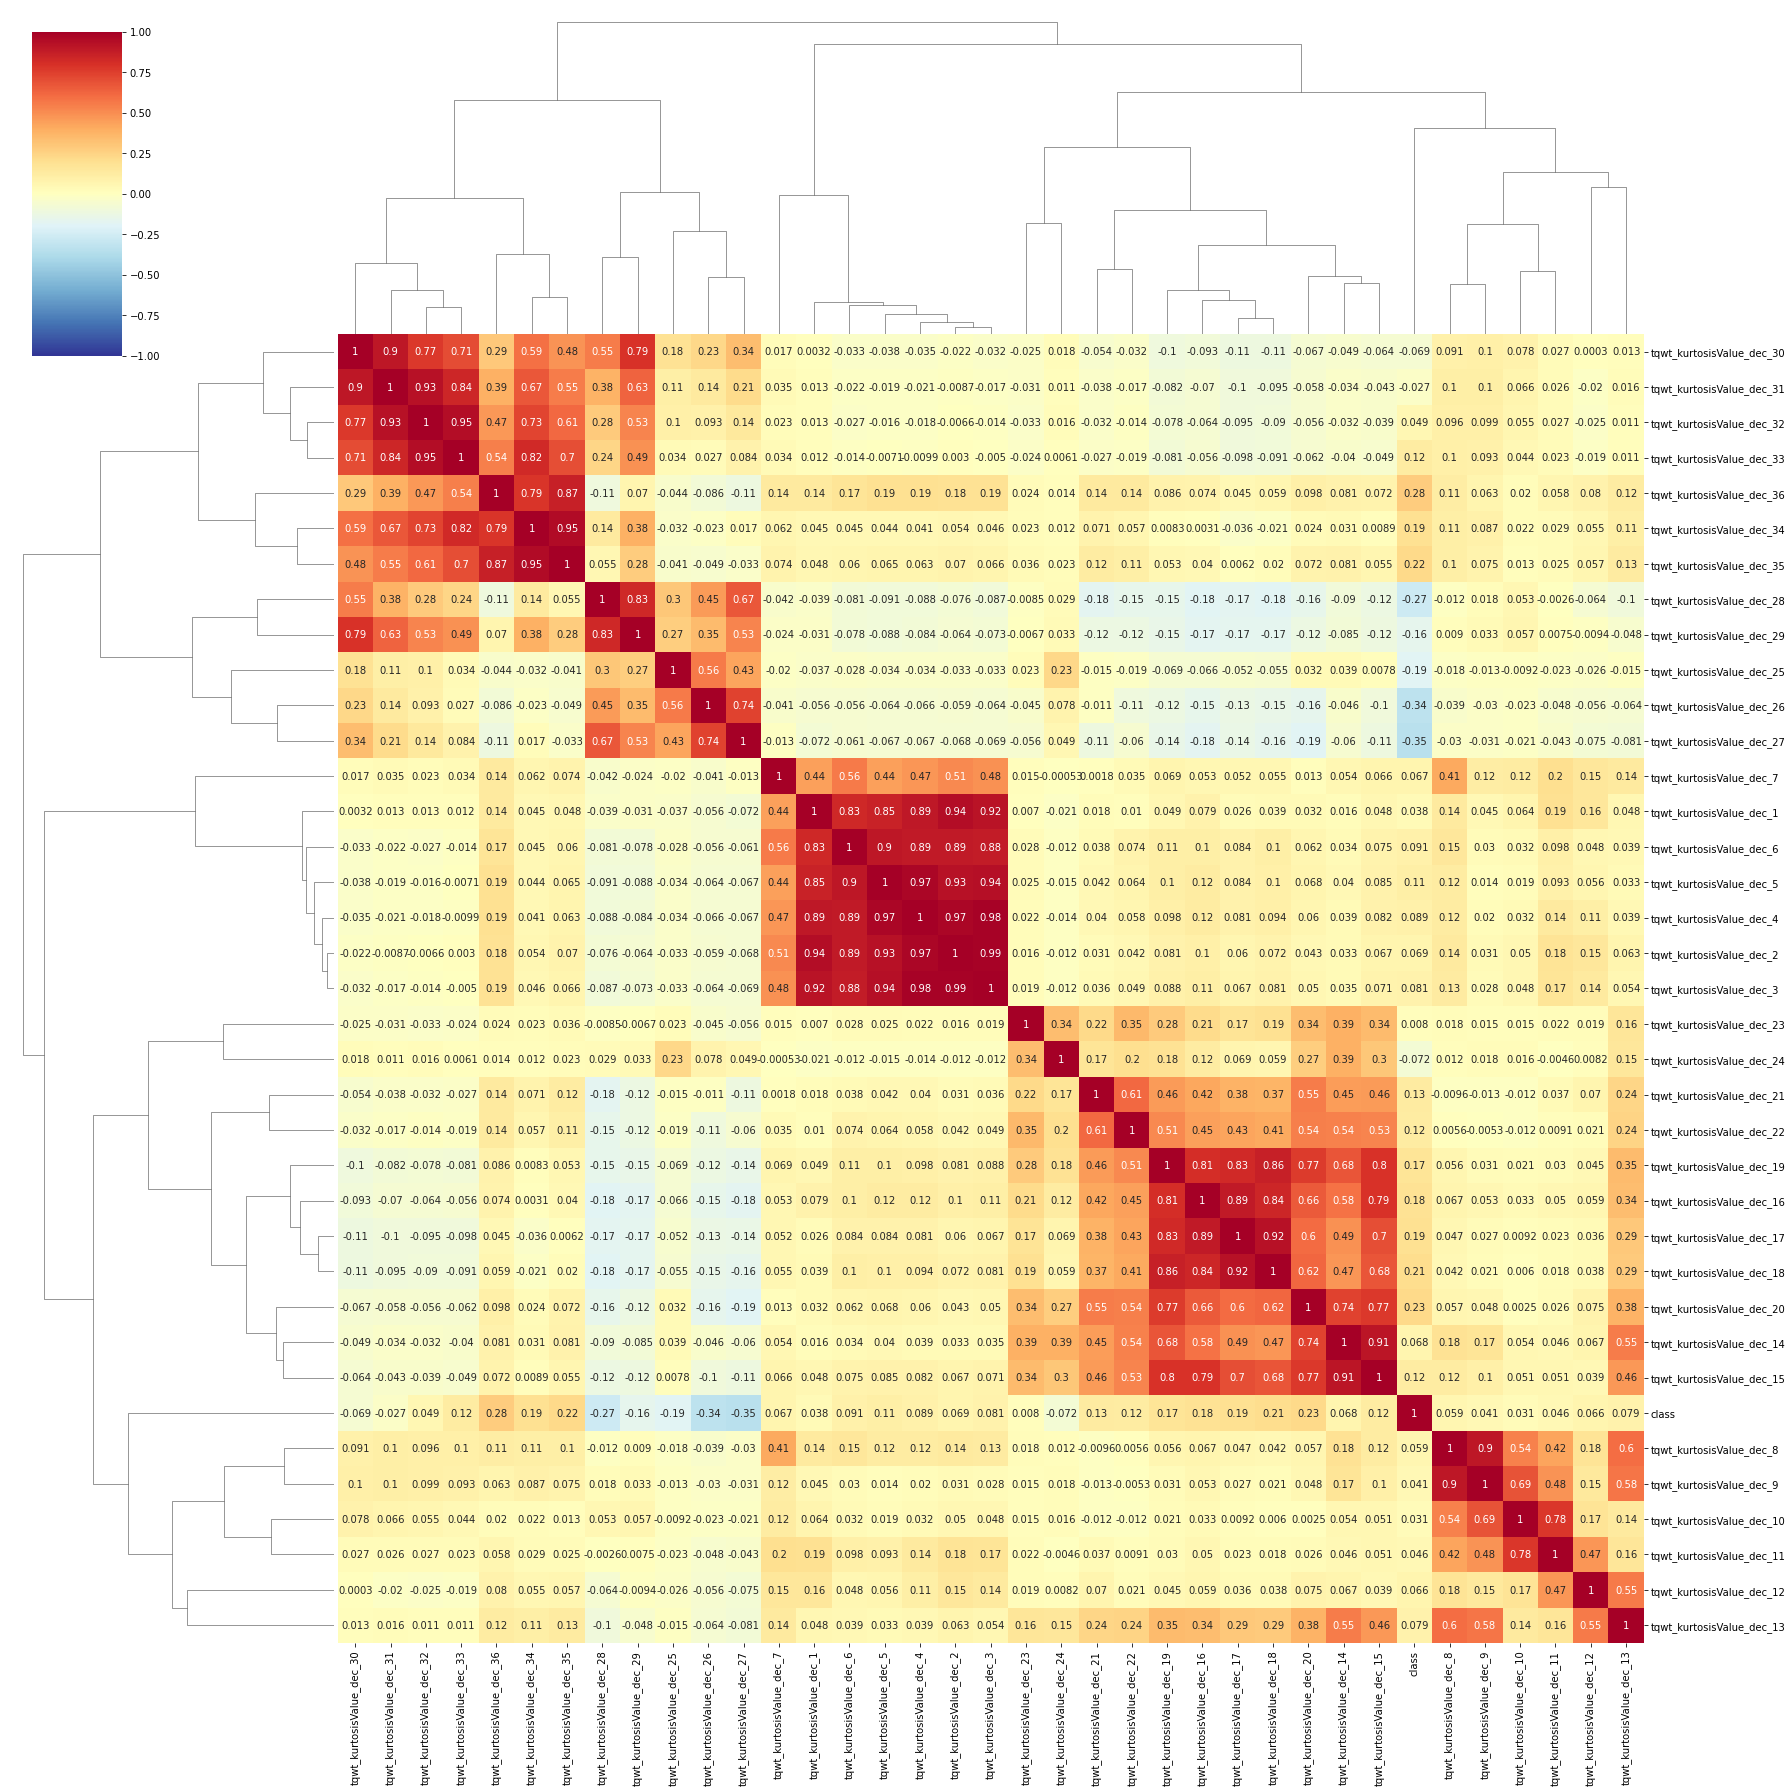

In [172]:
get_corr(df=dataset,
         start=718,
         end=754)

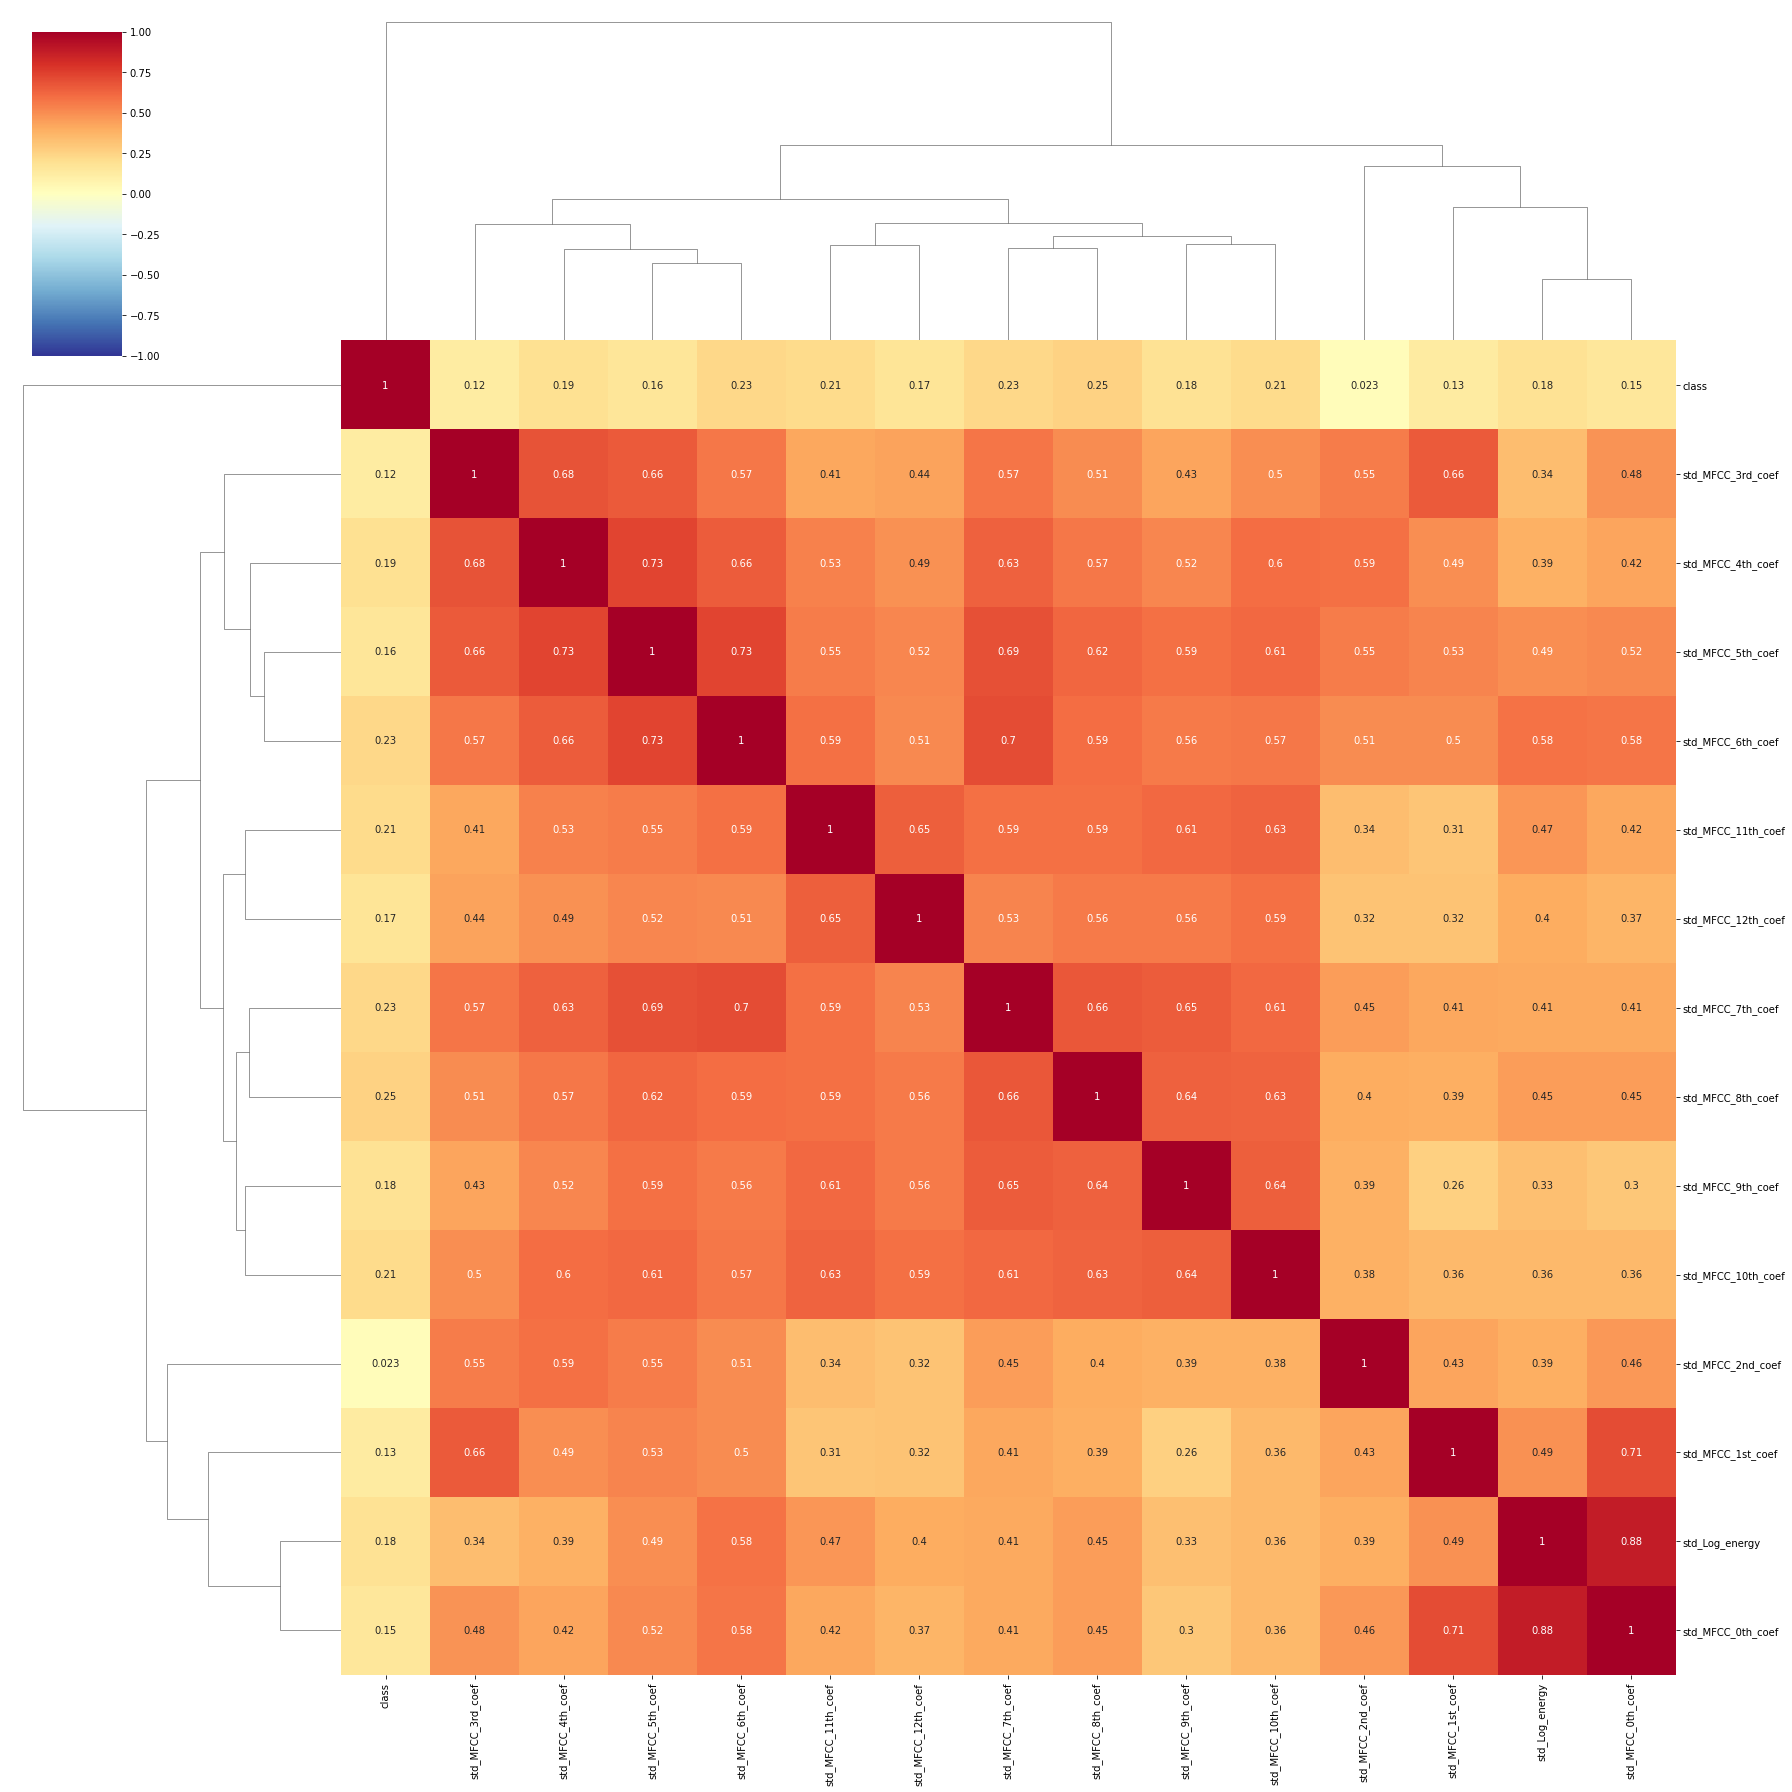

In [171]:
get_corr(df=dataset,
         start=98,
         end=112)

In [234]:
def re_outlier(df: pd.DataFrame,
               index: int = 0):
    q1 = df.iloc[:, index].quantile(0.25)
    q3 = df.iloc[:, index].quantile(0.75)
    iqr = q3 - q1
    indexer = df.iloc[:,index] > (q3 + iqr*1.5)
    return df.iloc[indexer.index, :]

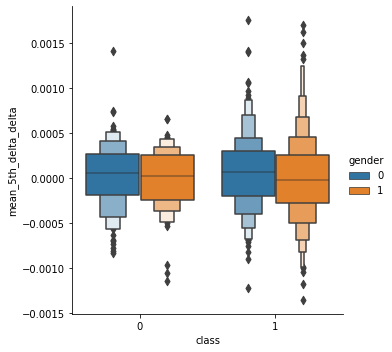

In [236]:
index = 90
sns.catplot(data = re_outlier(df=dataset,
                              index=index),
            x = "class",
            y = dataset.iloc[:, index].name,
            hue = "gender",
            kind="boxen")

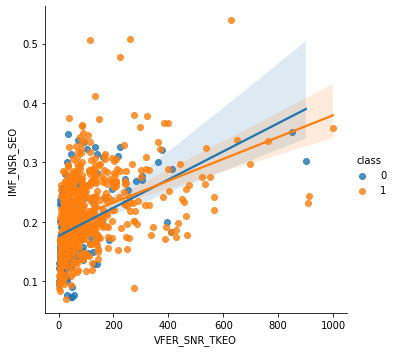

In [239]:
index = 53
sns.lmplot(data = re_outlier(df=dataset,
                             index=index),
           x = dataset.iloc[:, 46].name,
           y = dataset.iloc[:, index].name,
           hue = "class")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 63.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='class', ylabel='stdDevPeriodPulses'>

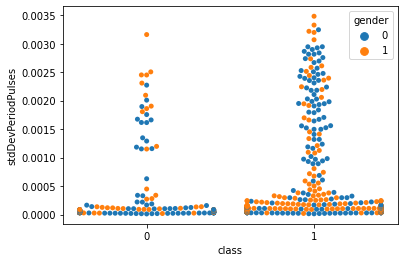

In [232]:
index = 8
sns.swarmplot(data = re_outlier(df=dataset,
                                index=index),
              x = "class",
              y = dataset.iloc[:, index].name,
              hue = "gender")